In [1]:
import fsspec
import aiohttp
import xarray as xr



## Open fssepc https filesytem 
http_user="XXX"
http_password="XXX"
fs = fsspec.filesystem('https',client_kwargs={'auth': aiohttp.BasicAuth(http_user, http_password)})

# full path to HTTP file 
url = 'https://datalsasaf.lsasvcs.ipma.pt/PRODUCTS/MSG/MDSSFTD/NETCDF/2022/08/02/NETCDF4_LSASAF_MSG_MDSSFTD_MSG-Disk_202208021515.nc'
print("file size:",fs.size(url)/1e6,"Mb")    # MB

file size: 4.915507 Mb


In [2]:
# open dataset in xarry 
ds = xr.open_dataset(fs.open(url),engine='h5netcdf')
print(ds)

<xarray.Dataset>
Dimensions:           (time: 1, lat: 3201, lon: 3201)
Coordinates:
  * lat               (lat) float32 80.0 79.95 79.9 79.85 ... -79.9 -79.95 -80.0
  * lon               (lon) float32 -80.0 -79.95 -79.9 ... 79.9 79.95 80.0
  * time              (time) datetime64[ns] 2022-08-02T15:15:00
Data variables:
    DSSF_TOT          (time, lat, lon) float32 ...
    FRACTION_DIFFUSE  (time, lat, lon) float32 ...
    crs               |S1 ...
    quality_flag      (time, lat, lon) float32 ...
Attributes: (12/27)
    Conventions:                CF-1.6
    algorithm_version:          2.0.0
    archive_facility:           IPMA
    base_algorithm_version:     v1.0.1
    date_created:               2022-08-02T15:34:51Z
    easternmost_longitude:      -80.0
    ...                         ...
    region_name:                MSG-Disk
    sensor:                     SEVI
    southernmost_latitude:      -80.0
    spatial_resolution:          0.05x 0.05
    time_coverage_start:        2022-

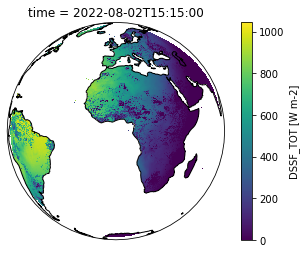

In [4]:
# do a simple plot
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

pvar = ds.DSSF_TOT.isel(time=0)
ax = plt.axes(projection=ccrs.Orthographic(0, 0))
#ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_global()
pvar.plot.imshow(ax=ax, transform=ccrs.PlateCarree(),interpolation='nearest')
ax.coastlines()

